In [548]:
import idx2numpy
import numpy as np

import torch

import matplotlib.pyplot as plt
import seaborn as sns

In [549]:
x_train = np.array(idx2numpy.convert_from_file('./data/emnist/emnist-letters-train-images-idx3-ubyte')).astype('float32')
y_train = np.array(idx2numpy.convert_from_file('./data/emnist/emnist-letters-train-labels-idx1-ubyte'))

x_test = np.array(idx2numpy.convert_from_file('./data/emnist/emnist-letters-test-images-idx3-ubyte')).astype('float32')
y_test = np.array(idx2numpy.convert_from_file('./data/emnist/emnist-letters-test-labels-idx1-ubyte'))

x_train /= 255
x_test /= 255

x_train = np.fliplr(x_train)
x_test = np.fliplr(x_test)

x_train = np.rot90(x_train, k=3, axes=(1, 2))
x_test = np.rot90(x_test, k=3, axes=(1, 2))

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

y_train -= 1
y_test -= 1

with open('data/emnist/emnist-letters-mapping.txt', 'r') as mapping_file:
    idx = {}
    for line in mapping_file.readlines():
        items = line.split()
        idx[int(items[0])-1] = chr(int(items[1]))

train_images = torch.tensor(x_train, dtype=torch.float32)
# train_labels = torch.tensor(y_train, dtype=torch.float32)
test_images = torch.tensor(x_test, dtype=torch.float32)
# test_labels = torch.tensor(y_test, dtype=torch.float32)

In [550]:
def plot_pattern(pattern: torch.Tensor, title: str, ax, size):
    img = pattern.view(size, size).numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

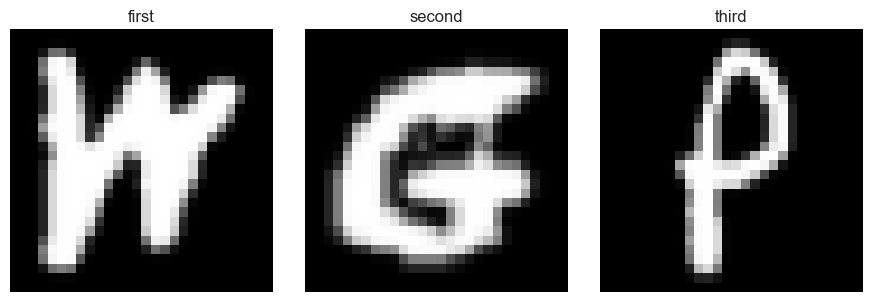

In [551]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_pattern(train_images[0], 'first', axs[0], 28)
plot_pattern(train_images[1], 'second', axs[1], 28)
plot_pattern(train_images[2], 'third', axs[2], 28)
plt.tight_layout()
plt.show()

In [552]:
train_images = torch.where(train_images > 0.5, 1, -1)
test_images = torch.where(test_images > 0.5, 1, -1)

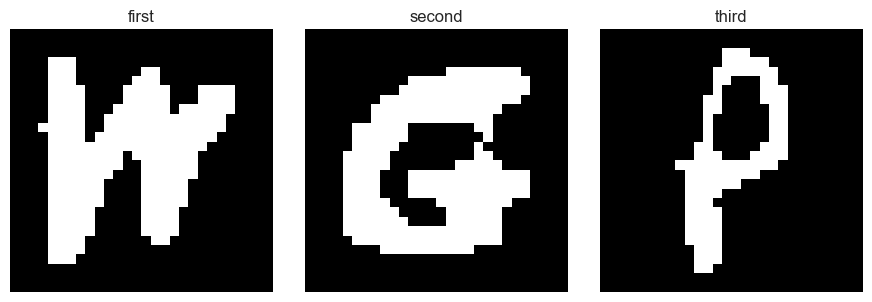

In [553]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_pattern(train_images[0], 'first', axs[0], 28)
plot_pattern(train_images[1], 'second', axs[1], 28)
plot_pattern(train_images[2], 'third', axs[2], 28)
plt.tight_layout()
plt.show()

In [554]:
import torch

class HopfieldNet(torch.nn.Module):
    def __init__(self, size):
        super().__init__()
        self.size = size
        self.weights = torch.zeros(size, size)

    def train_patterns(self, patterns: torch.Tensor):
        self.weights.zero_()
        for p in patterns:
            self.weights += torch.outer(p, p)
        self.weights.fill_diagonal_(0)  # без самосвязей
        self.weights /= len(patterns)

    def sign(self, x):
        return torch.where(x >= 0, 1, -1)

    def recall(self, input_pattern: torch.Tensor, steps=5):
        state = input_pattern.clone()
        for _ in range(steps):
            for i in range(self.size):
                h = torch.dot(self.weights[i].float(), state.float())
                state[i] = self.sign(h)
        return state

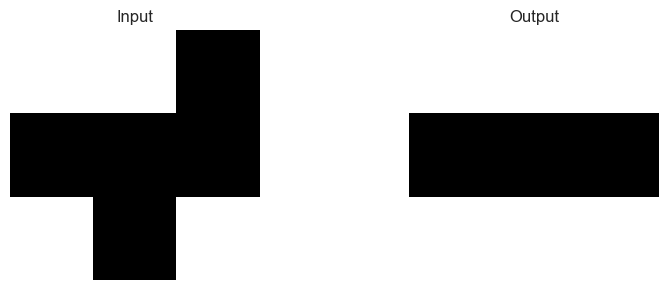

In [555]:
# Входные образы (2 паттерна по 9 бит)
patterns = torch.tensor([
    [1, 1, 1,
     -1, -1, -1,
     1, 1, 1],

    [1, -1, 1,
     1, -1, 1,
     1, -1, 1]
], dtype=torch.float32)

net = HopfieldNet(size=9)
net.train_patterns(patterns)

# Искажённый образ
test_input = torch.tensor([1, 1, -1, -1, -1, -1, 1, -1, 1], dtype=torch.float32)
output = net.recall(test_input)

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plot_pattern(test_input, 'Input', axs[0], 3)
plot_pattern(output, 'Output', axs[1], 3)
plt.tight_layout()
plt.show()

In [556]:
43
108
555
14
33

33

In [557]:
patterns = [list(map(int,  train_images[i])) for i in [43, 108, 555]]

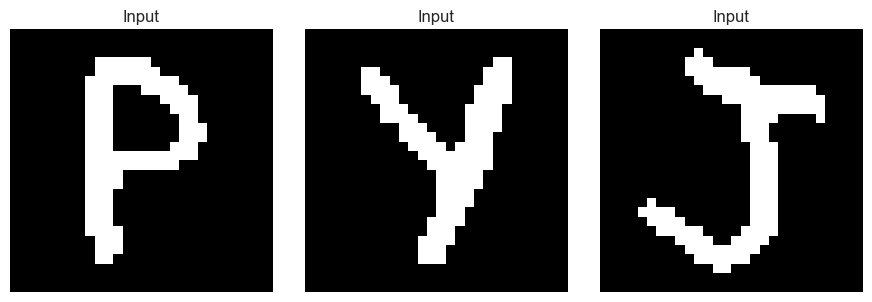

In [558]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_pattern(train_images[43], 'Input', axs[0], 28)
plot_pattern(train_images[108], 'Input', axs[1], 28)
plot_pattern(train_images[555], 'Input', axs[2], 28)
plt.tight_layout()
plt.show()

In [559]:
133, 10, 60

(133, 10, 60)

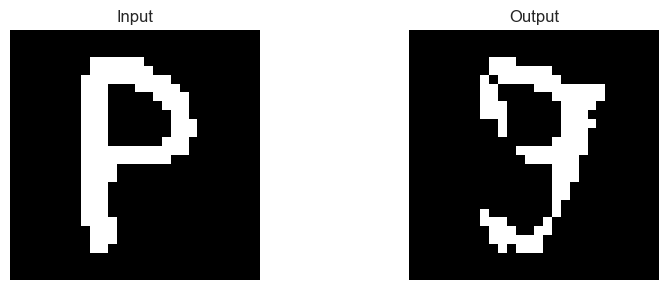

In [560]:
patterns = torch.tensor(patterns, dtype=torch.float32)

net = HopfieldNet(size=784)
net.train_patterns(patterns)

test_input = train_images[43]
output = net.recall(test_input)

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plot_pattern(test_input, 'Input', axs[0], 28)
plot_pattern(output, 'Output', axs[1], 28)
plt.tight_layout()
plt.show()